<img src='./img/top.png'>
<h1>Um estudo sobre acidentes aéreos</h1>
por Paulo Henrique Vasconcellos

<h1>Uma breve introdução</h1>

Por muitos anos os aviões tem sido considerados o segundo meio de transporte mais seguro do mundo, perdendo apenas para elevadores. Cobrindo longas viagens em um curto espaço de tempo, tais aeronaves proveram diversas vantagens para o mundo, tanto comercial quanto a lazer. Infelizmente, como todo meio de transporte, as aeronaves possuem sua conta de tragédias. O último caso, até a data de publicação deste estudo <a href='http://globoesporte.globo.com/sc/futebol/times/chapecoense/acidente/'>foi o acidente do avião da LAMIA, que transportava o time de futebol da Chapecoense para a final de um campeonato na Colombia</a>. O caso reacendeu discursões, destacando a segurança dos aviões e até onde a capacitação humana influência no desenrolar de um incidente.

<h1>Sobre este estudo</h1>

Nesta apresentação, eu estarei utilizando dados abertos disponibilizados pela CENIPA - Centro de Investigação e Prevenção de Acidentes aeronáuticos. Tais arquivos conterão informações sobre ocorrências envolvendo aeronaves nos últimos 10 anos. Você pode acessar dados mais atualizados visitando <a href='http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira'>a página oficial de Dados Abertos Brasileiros</a>, mas, caso deseje, poderá estar realizando o download dos datasets utilizados aqui através dos links de download abaixo.
<br>
<br>
Para este estudo, utilizarei de dois datasets da CENIPA:
<br>
<br>
<a href='./dataset/ocorrencia.csv'>Ocorrencia.csv</a>: possui os dados sobre cada ocorrência registrada nos últimos 10 anos. Código da ocorrência, Data, Motivo da Ocorrência e Localização serão encontrados nesse conjunto de dados.
<br>
<br>
<a href='./dataset/aeronave.csv'>Aeronave.csv</a>: informações agrupadas sobre as aeronaves envolvidas nas ocorrências registradas no arquivo ocorrencia.csv. Aqui serão encontrados dados como: Modelo da Aeronave, Tipo de Aeronave, Fabricante, Quantidade de Fatalidades, dentre outras.

<img src='./img/img_2.png'>
<h1>Perguntas a serem respondidas</h1>

Dentre outros <i>insights</i> gerados através deste estudo, quero responder as seguintes perguntas:
<br>
<br>
<li>Quais são as maiores causas de ocorrências e, eventualmente, queda de aviões?</li>
<li>Como tem sido a progressão desses casos nos últimos anos? Tiveram menos ocorrências ou mais?</li>
<li>Quais os estados que mais possuem ocorrências registradas?</li>
<li>Qual tipo de aeronave possui mais problemas? Aviões, jatos, planadores? </li>
<li>Quais as fabricantes com maior número de defeitos registrados?</li>
<li>Será que durante o pouso é mais comum ter problemas do que durante a decolagem? Ou durante a viagem em si é mais frequente surgir defeitos?</li>
<li>Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?</li>
<li>Quantos incidentes com fatalidades (morte de passageiros e tripulação) temos registro nos últimos 10 anos?</li>

<h2>Importando bibliotecas</h2>

In [244]:
%matplotlib inline
import pandas as pd #Para criação de DataFrames
import matplotlib.pyplot as plt #Para plotagem
import random

<h2>Leitura dos dataset</h2>

In [245]:
ocorrencia = pd.read_csv('./dataset/ocorrencia.csv')
aeronave = pd.read_csv('./dataset/aeronave.csv')

In [246]:
print('O arquivo \"ocorrencia.csv\" ' + str(ocorrencia.shape[0]) + ' linhas e ' + str(ocorrencia.shape[1]) + ' colunas')

O arquivo "ocorrencia.csv" 2027 linhas e 19 colunas


In [247]:
print('O arquivo \"aeronave.csv\" ' + str(aeronave.shape[0]) + ' linhas e ' + str(aeronave.shape[1]) + ' colunas')

O arquivo "aeronave.csv" 2043 linhas e 22 colunas


<h2>Limpeza de Dados (Data Cleaning)</h2>

O primeiro processo deste estudo será realizar a limpeza e tratativa dos dados. Vamos inicialmente verificar como a tabela do arquivo "ocorrencia.csv" é apresentada.

In [248]:
ocorrencia.head(5)

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.0,2014-04-07,0,1,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.0,2016-07-07,0,1,1.0,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,SERIPA-7,FINALIZADA,A-105/CENIPA/2012,1.0,2012-09-20,4,1,NaN,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,SERIPA-5,ATIVA,A DEFINIR,NaN,NaN,0,1,NaN,2016-07-30


Acima você pode verificar como o arquivo está estruturado. Como disse no código anteriormente, o arquivo "ocorrencia.csv" contém 2027 linhas e 19 colunas. Ou seja, há 2027 registros de ocorrências dos últimos 10 anos.
<br>
<br>
Em seguida, quero descobrir como a linguagem Python está identificando cada coluna. Será que ele está tratando o código da ocorrência como número inteiro ou <i>string</i>? O comando ```dtypes``` nos responderá.

In [249]:
ocorrencia.dtypes

codigo_ocorrencia             int64
classificacao                object
tipo                         object
localidade                   object
uf                           object
pais                         object
aerodromo                    object
dia_ocorrencia               object
horario                      object
sera_investigada             object
comando_investigador         object
status_investigacao          object
numero_relatorio             object
relatorio_publicado         float64
dia_publicacao               object
quantidade_recomendacoes      int64
aeronaves_envolvidas          int64
saida_pista                 float64
dia_extracao                 object
dtype: object

Perceba que cada linha abaixo do comando ```dtypes``` representa uma coluna do conjunto de dados "ocorrencia.csv", totalizando 19 linhas. A sua direita, está a forma como a linguagem interpreta ela. ```codigo_ocorrencia``` está, de fato, sendo tratado como número inteiro (int64), enquanto campos como localidade, UF e classificação são executados como <i>string</i>, ou <i>object</i>, como visto acima.
<br>
<br>
O próximo passo é tratar os nomes das colunas que iremos trabalhar. Antes de mais nada, vamos exibir cada uma delas, usando o comando ```columns``` da biblioteca pandas.

In [250]:
#Colunas do arquivo 'ocorrencia.csv'
ocorrencia.columns

Index(['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'aerodromo', 'dia_ocorrencia', 'horario', 'sera_investigada',
       'comando_investigador', 'status_investigacao', 'numero_relatorio',
       'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes',
       'aeronaves_envolvidas', 'saida_pista', 'dia_extracao'],
      dtype='object')

Ocorrencia.csv é um arquivo relativamente grande. Ele possui muitas linhas e colunas que concedem muitos detalhes a cerca da ocorrência registrada, contudo, não precisamos de todas elas para esse estudo. A fim de deixar a exibição mais apresentável e limpa, vamos eliminar algumas colunas que não precisaremos, como o numero do relatório, comando investigador e aerodromo.

In [251]:
#Retirando colunas que não serão usadas
ocorrencia.drop(['aerodromo','horario','sera_investigada','comando_investigador',
                 'relatorio_publicado','dia_publicacao','quantidade_recomendacoes',
                 'aeronaves_envolvidas','saida_pista','dia_extracao', 'numero_relatorio'], axis = 1, inplace = True)

Agora temos todas as colunas que precisaremos em nosso dataset, mas, ainda não estou feliz como as elas são nomeadas no arquivo. Por exemplo: poderiamos mudar a coluna codigo_ocorrencia para Código da Ocorrência, a fim de deixar a leitura e entendimento mais nítido. É exatamente isso que vamos fazer no próximo passo. Ao fim, incluirei uma nova coluna que será usada para realizar cálculos.

In [252]:
#Renomeando colunas do dataset ocorrencia.csv
ocorrencia.columns = ['CÓDIGO DA OCORRÊNCIA','CLASSIFICAÇÃO','TIPO DE OCORRÊNCIA','LOCALIDADE',
                      'UF','PAÍS','DIA DA OCORRÊNCIA','STATUS DA INVESTIGAÇÃO']

#Inserindo coluna para contagem
ocorrencia['CONTAGEM'] = 1

Vamos também remover as linhas em que o campo Código da Ocorrência está inválido. Este arquivo não possui nenhum registro inválido, mas para casos futuros, já vou deixar esse comando pronto.

In [253]:
#Derrubando colunas onde o código da ocorrência é inválido
ocorrencia['CÓDIGO DA OCORRÊNCIA'].dropna(axis = 0, inplace = True)

Vamos ver como ficou nosso novo DataFrame.

In [254]:
ocorrencia.head()

,CÓDIGO DA OCORRÊNCIA,CLASSIFICAÇÃO,TIPO DE OCORRÊNCIA,LOCALIDADE,UF,PAÍS,DIA DA OCORRÊNCIA,STATUS DA INVESTIGAÇÃO,CONTAGEM
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,2013-05-05,NaN,1
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,2013-11-25,FINALIZADA,1
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,2008-08-07,FINALIZADA,1
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,2011-08-11,FINALIZADA,1
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,2009-12-28,ATIVA,1


<h1>Visualização dos Dados (Data Visualization)</h1>

Certo, nosso DataFrame está mais limpo e apresentável. Agora, vamos realizar alguns <i>Insights</i> em torno dos dados contidos aqui.

As primeiras perguntas que eu gostaria de responder são:<br><br>
<b>Como é classificada uma ocorrência? Como se divide o total geral nestas categorias?</b>


Para responder a isso, criei a variável ```tipo_ocorrencia```, que armazenará as informações deste dataset agrupadas por classificação. A coluna ```CONTAGEM``` será somada, retornando um gráfico com o total de ocorrências para cada classificação.
<br>
Ficou confuso? Vamos ver como funciona na prática!

In [255]:
#Cores para serem usadas nos gráficos
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

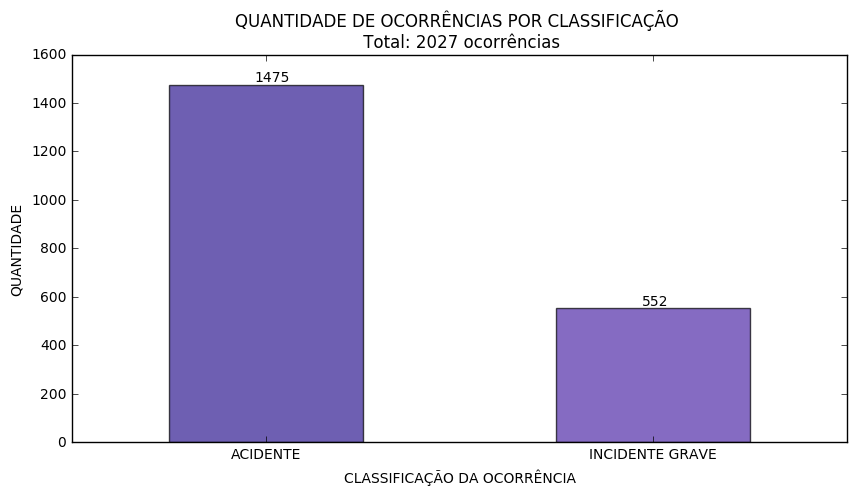

In [256]:
classificacao = ocorrencia.groupby('CLASSIFICAÇÃO')['CONTAGEM'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in classificacao.patches:
    b=p.get_bbox()
    classificacao.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
plt.ylabel('QUANTIDADE')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR CLASSIFICAÇÃO \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.show()

Como podemos ver no gráfico, as ocorrências são divididas em duas principais classificações: Acidente e Incidente Grave. Vale lembrar que, embora este arquivo trate de ocorrências envolvendo aeronaves nos últimos 10 anos, não significa que todas as ocorrências foram graves ou que houveram fatalidades. Muitos dos casos são sim, de quedas de avião decorrente de alguma falha humana ou mecânica, mas você verá mais a frente que nem todos são assim.

Após classificarmos nossas ocorrências, quero responder a mais uma pergunta: 

<b>Quais os tipos de ocorrências que existem e qual foi sua frequência nestes últimos anos?</b>

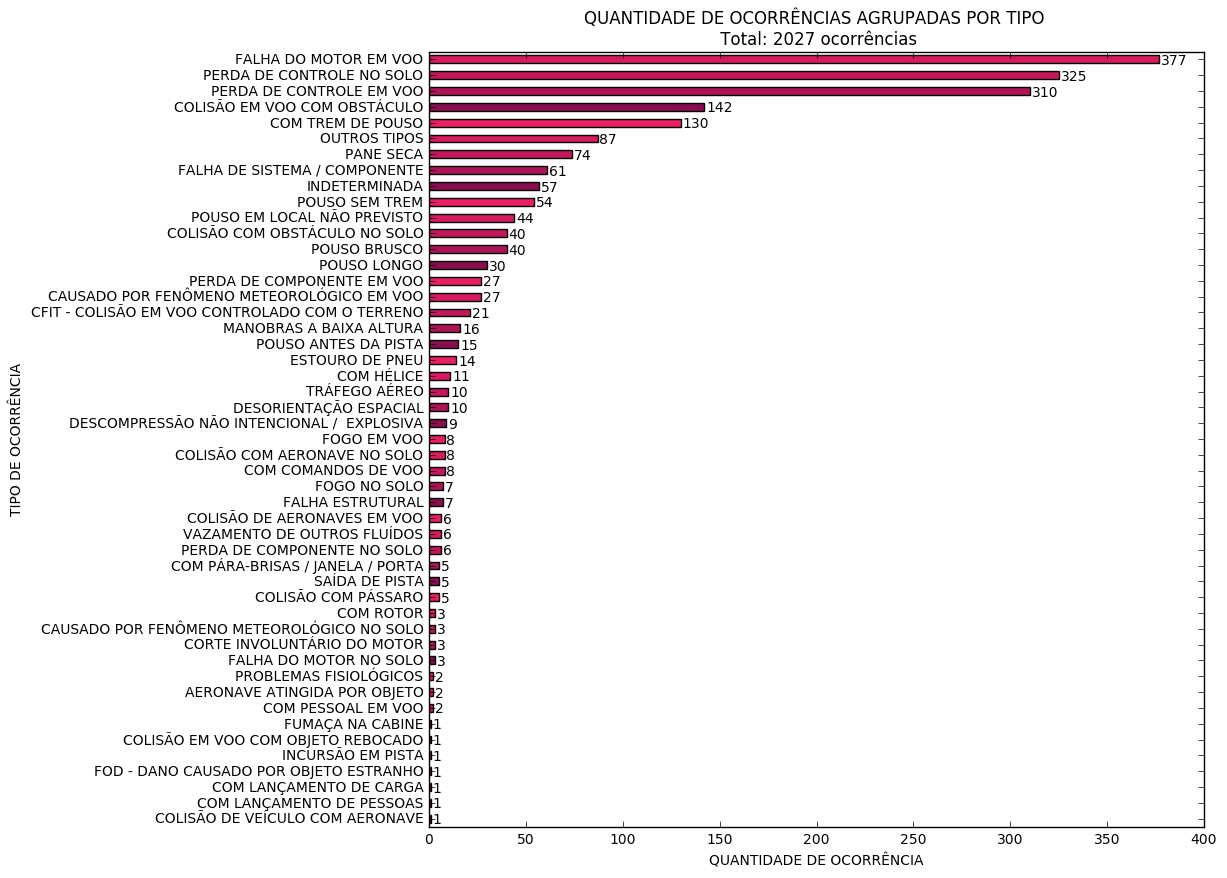

In [257]:
ax = ocorrencia.groupby('TIPO DE OCORRÊNCIA')['CONTAGEM'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(10,10))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

O processo de geração deste gráfico foi semelhante ao anterior: agrupei todos os dados da coluna 'TIPO' e somei os valores da coluna 'CONTAGEM'. Então, realizei a plotagem desses dados para melhor visualização.

De acordo com os dados desse <i>plot</i>, as maiores causas de ocorrências são devidas a falhas de motor durante o vôo, seguida por perda de controle em solo e perda de controle em vôo. Embora tais causas nos remetam a falha humana na operação, não podemos levar isto como uma regra. Uma perda de controle em vôo pode dever-se desde incompetência técnica até falha em dispositivos como o radar. Todavia, a escala destes três principais motivos é uma causa a se preocupar.

Seguindo nosso estudo, vamos responder a próxima pergunta:<br><br>
<b>Como tem sido a progressão desses últimos anos? Tiveram menos ocorrências ou mais?</b>

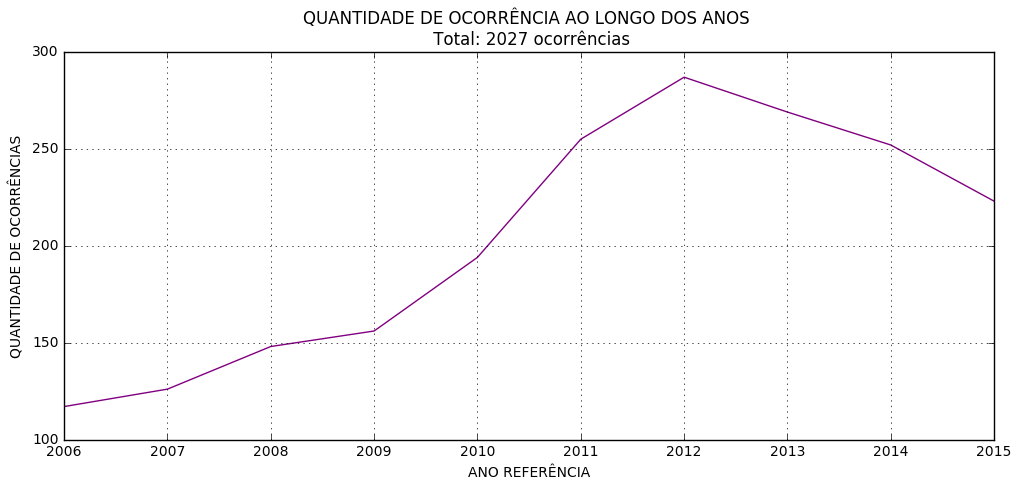

In [258]:
plotagem_data = ocorrencia.copy()
plotagem_data['DIA DA OCORRÊNCIA'] = plotagem_data['DIA DA OCORRÊNCIA'].apply(lambda x: x.replace(x,x[0:4]))
plotagem_data.groupby('DIA DA OCORRÊNCIA')['CONTAGEM'].sum().plot(color='purple', figsize=(12,5), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA AO LONGO DOS ANOS \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('ANO REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

A progressão de ocorrências aéres nos últimos 10 anos tem crescido assustadoramente. Enquanto em 2006 tivemos menos que 130 ocorrências, em 2012 esse número subiu para quase 300! Vale lembrar que, embora em 2007 tenham ocorridos menos casos envolvendo aviões, este foi o ano do maior desastre aéreo já ocorrido no Brasil: o acidente do avião da TAM, que matou 194 pessoas. Mas, vamos deixar essa parte mais a frente deste estudo. A boa notícia é que, de 2012 até agora o número de ocorrências tem diminuído.

E quanto aos estados? <b>Quais foram os que mais registraram ocorrências?</b>

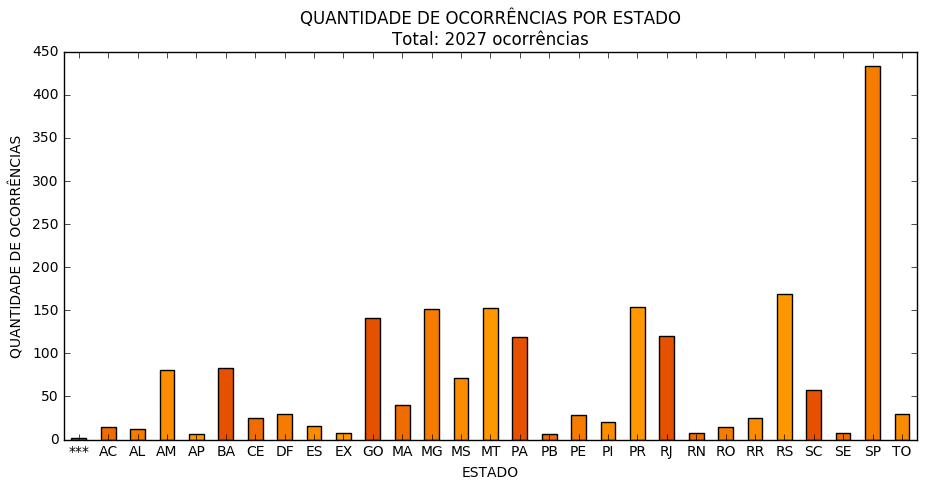

In [259]:
ax_estado =  ocorrencia.groupby('UF')['CONTAGEM'].sum().plot(kind='bar', color=random.choice(colors), figsize=(11,5))

plt.xlabel('ESTADO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR ESTADO\nTotal: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.xticks(rotation=0)
plt.show()

O Estado de São Paulo foi o que mais teve ocorrências de 2006 a 2015. O número preocupante é maior do que os encontrados em todos os estados da região sudeste juntos! É de conhecimento que São Paulo é o estado com mais aeroportos do Brasil o que nos permitiria cogitar que este é o motivo de tantas ocorrências, não obstante, outros estados com muitos aeroportos como: Goiás, Maranhão, Mato Grosso e Minas Gerais obtiveram um <i>score</i> consideravelmente menor que o estado de São Paulo.

Você deve ter percebido duas informações diferentes nesse gráfico: os "estados" \*\*\*\ e EX. Este último, por exemplo, representa ocorrências registradas fora do território brasileiro, mas com aeronaves nacionais.

Já os três asterísticos representam locais que não tiveram sua localização identificadas (vide tabela abaixo), como a ocorrência 49474, que ocorreu em águas internacionais.

In [260]:
#Duas ocorrências em que não tiveram locais determinados
ocorrencia[ocorrencia['UF'] == '***']

,CÓDIGO DA OCORRÊNCIA,CLASSIFICAÇÃO,TIPO DE OCORRÊNCIA,LOCALIDADE,UF,PAÍS,DIA DA OCORRÊNCIA,STATUS DA INVESTIGAÇÃO,CONTAGEM
2006,53112,ACIDENTE,OUTROS TIPOS,NÃO IDENTIFICADA,***,BRASIL,2015-03-06,ATIVA,1
2025,49474,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,ÁGUAS INTERNACIONAIS,***,BRASIL,2013-09-01,ATIVA,1


<h1>Analisando o dataset de aeronaves</h1>

Agora iremos partir para o segundo conjunto de dados deste estudo: o dataset de aeronaves. Este arquivo possui informações acerca dos veículos que estavam envolvidos nas ocorrências registradas dos últimos anos. Primeiro, realizarei a fase de limpeza dos dados (semelhante ao feito anteriormente), depois, irei trazer alguns <i>Insights</i> a partir da visualização dos dados. Vamos começar?

<h2>Limpeza dos Dados (Data Cleaning)</h2>

O arquivo "aeronave.csv" possui 24 colunas com informações sobre os aviões. Muitos desses dados não são de grande valia para esse estudo, como matricula da aeronave, seu código, peso máximo na decolagem e categoria de registro. Inicialmente, irei removê-los do DataFrame para melhor visualização, depois, converterei colunas indevidas com seu respectivo tipo de arquivo, seguido por processos como renomeação de colunas e eliminação de dados nulos.

Abaixo, apresento as primeiras linhas do arquivo.

In [261]:
aeronave.head()

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,NaN,2016-07-30
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,DECOLAGEM,INSTRUÇÃO,LEVE,NaN,2016-07-30
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,...,BRASIL,TPP,PARTICULAR,SNDU,SBSL,CORRIDA APÓS POUSO,PRIVADA,LEVE,NaN,2016-07-30
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389,...,BRASIL,TPR,REGULAR,****,****,SUBIDA,REGULAR,NENHUM,NaN,2016-07-30


A seguir eu retiro as colunas que não me interessam para este projeto. Perceba no bloco abaixo como fica a tabela sem esses dados.

In [262]:
aeronave.drop(['codigo_aeronave','matricula','codigo_operador','peso_maximo_decolagem',
               'categoria_registro', 'origem_voo', 'destino_voo', 'dia_extracao'], axis = 1, inplace = True)

aeronave.head()

,codigo_ocorrencia,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,quantidade_assentos,ano_fabricacao,pais_registro,categoria_aviacao,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades
0,45602,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,2.0,1962.0,BRASIL,INSTRUÇÃO,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,NaN
1,53551,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,2.0,1960.0,BRASIL,INSTRUÇÃO,DECOLAGEM,INSTRUÇÃO,LEVE,NaN
2,43721,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,6.0,1966.0,BRASIL,TÁXI AÉREO,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN
3,35556,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,6.0,1979.0,BRASIL,PARTICULAR,CORRIDA APÓS POUSO,PRIVADA,LEVE,NaN
4,32579,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,117.0,1975.0,BRASIL,REGULAR,SUBIDA,REGULAR,NENHUM,NaN


Feita a exclusão, é hora de visualizar como o Python está tratando cada coluna.

In [263]:
aeronave.dtypes

codigo_ocorrencia           int64
equipamento                object
fabricante                 object
modelo                     object
tipo_motor                 object
quantidade_motores        float64
quantidade_assentos       float64
ano_fabricacao            float64
pais_registro              object
categoria_aviacao          object
fase_operacao              object
tipo_operacao              object
nivel_dano                 object
quantidade_fatalidades    float64
dtype: object

Um primeiro ponto que me incomodou foi o fato dele estar tratando as colunas de quantidades de assentos, ano de fabricação, quantidade de motores e quantidade de fatalidades como valores flutuantes (float64), ou seja, com pontos decimais. Ora, não existe, por exemplo, aeronaves com dois motores e meio (2,5), tampouco morrem durante um acidente três pessoas e meia (3,5). Mais a frente, durante a fase de visualização dos dados, isso será um problema, portanto, vamos tratá-lo.

Primeiro eu crio duas funções: ```convert_na``` e ```convert_dtype```. A primeira, irá procurar por valores nulos nas linhas das colunas especificadas no momento do chamado da função, e irá preenche-las com o numeral 0. Já a segunda função irá converter esse DataFrame atualizado para um tipo específico de formato (em nosso caso, numeros inteiros). Confira abaixo maiores detalhes de cada função.

In [264]:
'''
A função convert_na possui dois argumentos: um DataFrame e sua coluna. 
Tal Series terá todos os seus valores nulos (NaN) atualizados para o numeral 0.
'''

def convert_na(dataframe, column):
    for i in column:
        dataframe[i].fillna(0, inplace = True)

convert_na(aeronave,['quantidade_fatalidades','quantidade_motores','ano_fabricacao','quantidade_assentos'])

In [265]:
'''
A função convert_dtype possui três argumentos: um DataFrame, uma coluna (Series) e o dtype que o usuário deseja alterar.
Para cada Series declarada na função, ela irá converter tal coluna para o dtype desejado
'''

def convert_dtype(dataframe, column, dtype):
    for i in column:
        dataframe[i] = dataframe[i].astype(dtype)

convert_dtype(aeronave,['quantidade_motores','quantidade_assentos','ano_fabricacao','quantidade_fatalidades'],int)

Declaradas as funções e realizada as devidas alterações nas colunas, vamos ver como o Python interpretará tais dados agora.

In [266]:
#Dtypes de float alterados para int
aeronave.dtypes

codigo_ocorrencia          int64
equipamento               object
fabricante                object
modelo                    object
tipo_motor                object
quantidade_motores         int32
quantidade_assentos        int32
ano_fabricacao             int32
pais_registro             object
categoria_aviacao         object
fase_operacao             object
tipo_operacao             object
nivel_dano                object
quantidade_fatalidades     int32
dtype: object

Como desejei, as colunas foram alteradas com sucesso de decimais para números inteiros.

O próximo passo é renomear todas as colunas restantes nesse DataFrame para podermos ter uma visualização melhor. Aproveito para converter todos os valores nulos para a sentença "NÃO IDENTIFICADO". Isso facilitará o entendimento. O último <i>statement</i> do código irá incluir uma nova coluna no DataFrame: CONTAGEM, a qual irei atribuir o valor único de 1 para poder realizar alguns cálculos com mais facilidade.

In [267]:
aeronave.columns = ['CÓDIGO DA OCORRÊNCIA','EQUIPAMENTO','FABRICANTE','MODELO','TIPO DE MOTOR','QUANTIDADE DE MOTORES',
                    'QUANTIDADE DE ASSENTOS','ANO DE FABRICAÇÃO','PAÍS DE REGISTRO','CATEGORIA DE AVIÃO','FASE DE OPERAÇÃO',
                    'TIPO DE OPERAÇÃO','NÍVEL DE DANO','QUANTIDADE DE FATALIDADES']
aeronave = aeronave.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
aeronave['CONTAGEM'] = 1

Vamos visualizar como ficou o novo DataFrame.

In [268]:
#DataFrame alterado
aeronave.head()

,CÓDIGO DA OCORRÊNCIA,EQUIPAMENTO,FABRICANTE,MODELO,TIPO DE MOTOR,QUANTIDADE DE MOTORES,QUANTIDADE DE ASSENTOS,ANO DE FABRICAÇÃO,PAÍS DE REGISTRO,CATEGORIA DE AVIÃO,FASE DE OPERAÇÃO,TIPO DE OPERAÇÃO,NÍVEL DE DANO,QUANTIDADE DE FATALIDADES,CONTAGEM
0,45602,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1,2,1962,BRASIL,INSTRUÇÃO,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,0,1
1,53551,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1,2,1960,BRASIL,INSTRUÇÃO,DECOLAGEM,INSTRUÇÃO,LEVE,0,1
2,43721,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2,6,1966,BRASIL,TÁXI AÉREO,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,0,1
3,35556,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1,6,1979,BRASIL,PARTICULAR,CORRIDA APÓS POUSO,PRIVADA,LEVE,0,1
4,32579,AVIÃO,BOEING COMPANY,737-241,JATO,2,117,1975,BRASIL,REGULAR,SUBIDA,REGULAR,NENHUM,0,1


Um fato me chamou a atenção neste arquivo de aeronaves: seu tamanho é maior que o arquivo de ocorrências. Levando em consideração que para cada aeronave há uma ocorrência, o que explicaria esse detalhe?

Para termos certeza de que os DataFrames ```ocorrencia.csv``` e ```aeronave.csv``` são diferentes, vamos conferir no código.

In [269]:
#Verificando se os dataframes são iguais
aeronave['CÓDIGO DA OCORRÊNCIA'].equals(ocorrencia['CÓDIGO DA OCORRÊNCIA'])

False

Sim, de fato são diferentes. A explicação para este fato é de que uma ocorrência que envolveu mais de uma aeronave terá o mesmo número de ocorrência para ambos. Vimos no gráfico acima que há casos onde aeronaves se chocaram em vôo. Para ambas foi aberta o mesmo número de ocorrências.

Vamos através do código abaixo, descobrir quantas ocorrências nós temos sob o mesmo código.

In [270]:
#Pegando linhas duplicadas no DataFrame
ocorrencias_duplicadas = aeronave[aeronave['CÓDIGO DA OCORRÊNCIA'].duplicated()].reset_index(drop=True)
ocorrencias_duplicadas.drop('CONTAGEM', axis = 1, inplace = True)
print('Há ' + str(ocorrencias_duplicadas.shape[0]) + ' ocorrências duplicadas.')

Há 16 chamados duplicados.


Vamos visualizar algumas das ocorrências de mesmo número

In [271]:
ocorrencias_duplicadas.head(6)

,CÓDIGO DA OCORRÊNCIA,EQUIPAMENTO,FABRICANTE,MODELO,TIPO DE MOTOR,QUANTIDADE DE MOTORES,QUANTIDADE DE ASSENTOS,ANO DE FABRICAÇÃO,PAÍS DE REGISTRO,CATEGORIA DE AVIÃO,FASE DE OPERAÇÃO,TIPO DE OPERAÇÃO,NÍVEL DE DANO,QUANTIDADE DE FATALIDADES
0,52288,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-B,PISTÃO,1,2,1963,BRASIL,INSTRUÇÃO,POUSO,INSTRUÇÃO,NENHUM,0
1,50801,HELICÓPTERO,ROBINSON HELICOPTER,R44,PISTÃO,1,4,2001,BRASIL,PARTICULAR,PARTIDA DO MOTOR,PRIVADA,SUBSTANCIAL,0
2,38419,AVIÃO,LEARJET,45,JATO,2,9,2004,BRASIL,PARTICULAR,ESTACIONAMENTO,PRIVADA,NÃO IDENTIFICADO,0
3,38419,AVIÃO,RAYTHEON AIRCRAFT,HAWKER 800XP,JATO,2,10,1998,BRASIL,TÁXI AÉREO,ESTACIONAMENTO,TÁXI AÉREO,NÃO IDENTIFICADO,0
4,43869,ULTRALEVE,NÃO IDENTIFICADO,FOX II,PISTÃO,1,2,1990,BRASIL,EXPERIMENTAL,INDETERMINADA,EXPERIMENTAL,DESTRUÍDA,0
5,45222,AVIÃO,CESSNA AIRCRAFT,550,JATO,2,10,1978,BRASIL,TÁXI AÉREO,DECOLAGEM,TÁXI AÉREO,NENHUM,0


<h1>Visualização dos Dados (Data Visualization)</h1>

Agora que tratamos e limpamos nosso <i>dataset</i>, é hora de visualizarmos os dados. Em nosso conjunto, existe a informação sobre o tipo de motor que a aeronave utiliza, sendo assim, a primeira pergunta que desejo responder é: <br><br><b>Qual tipo de motor mais gerou ocorrências nos últimos 10 anos?</b>

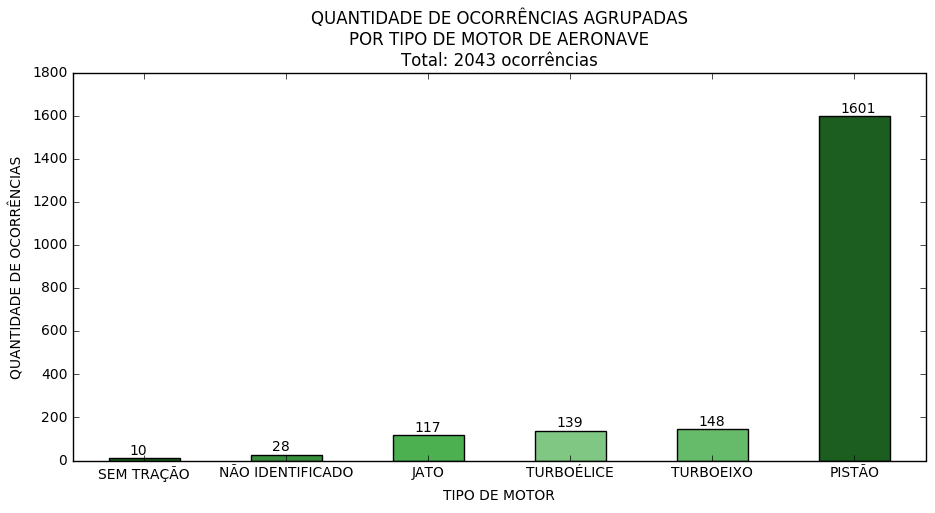

In [272]:
ax = aeronave.groupby('TIPO DE MOTOR')['CONTAGEM'].sum().sort_values().plot(kind='bar', color=random.choice(colors), figsize=(11,5))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS\nPOR TIPO DE MOTOR DE AERONAVE\nTotal: '+str(aeronave['CONTAGEM'].sum())+' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

Os motores a pistão reinam com as maiores quantidades de ocorrências geradas. Esse motor é um dos mais antigos (e até usados) motores de aeronave no mundo, muito comum em aviões monomotores. Além do baixo custo, eles são semelhantes aos motores de carro, mas tratados com os padrões de qualidade e confiança da aeronáutica, funcionando muito bem em baixar altitudes.

O segundo e terceiro lugar ficaram para os motores de Turboeixo e Turboélice. Assim como o motor de pistão, o Turboélice é caracterizado pela hélice que fica a frente do avião, utilizando a famosa Lei da Ação e Reação para movimentar a aeronave, contudo, sua diferença está em utilizar pequenos jatos para realizar tal funcionamento.

Próxima pergunta:
<br>
<b>Será que ocorrências envolvendo aviões aparecem em menor frequência do que para helicópter e outras aeronaves?</b>
<br>

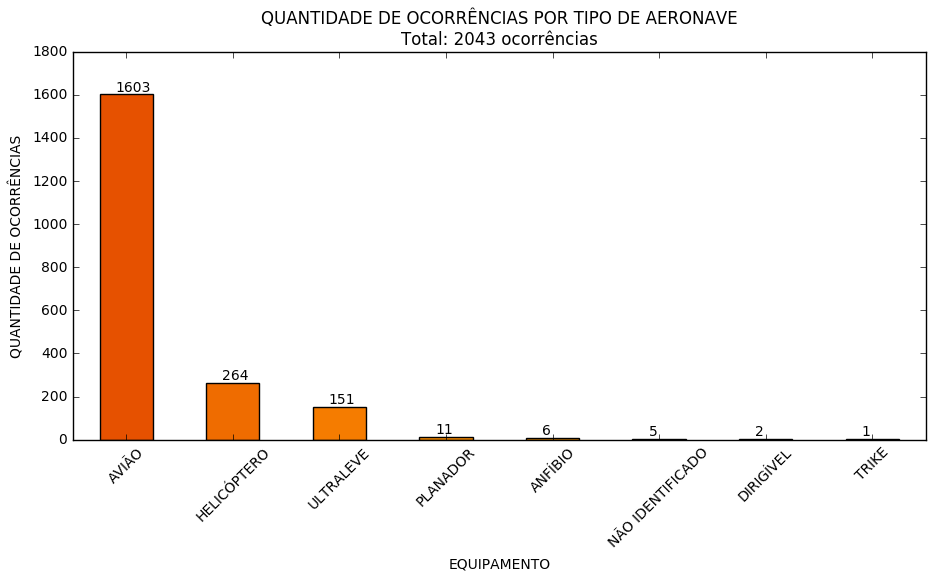

In [273]:
ax = aeronave.groupby('EQUIPAMENTO')['CONTAGEM'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(11,5), color=random.choice(colors))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS POR TIPO DE AERONAVE\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=45)
plt.show()

Definitivamente, ocorrências envolvendo aviões surgem com muito mais frequência do que para helicópteros. Na verdade, a quantidade total de ocorrências de aviões é maior do que a soma de todos os outros tipos de aeronave. Até mesmo dirigíveis aparecem neste <i>dataset</i>!

Se temos tantas quantidades de ocorrências registradas nesses anos, <b>quais são as fabricantes que mais aparecem nos problemas relatados?</b>

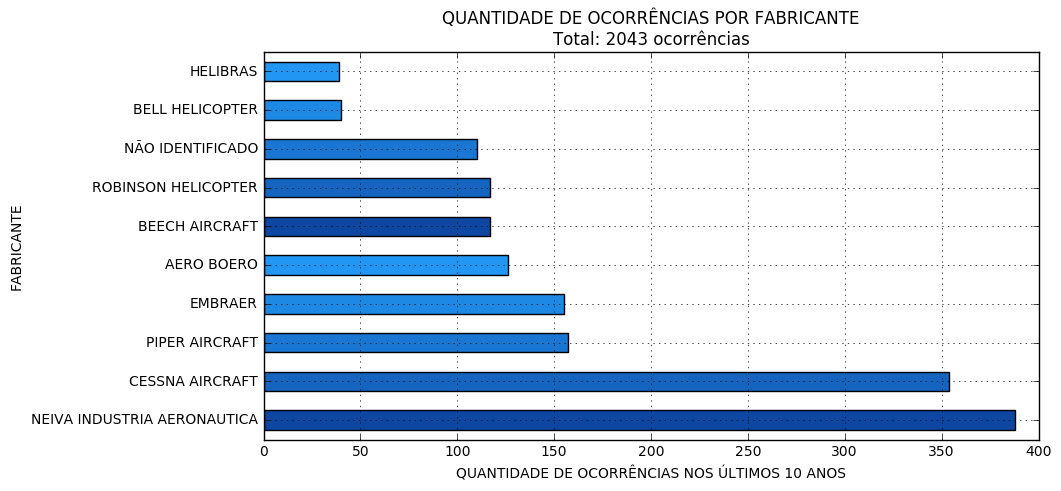

In [274]:
ocorrencias_fabricante = aeronave.groupby('FABRICANTE')['CONTAGEM'].sum().sort_values(ascending = False)
ocorrencias_fabricante.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIAS POR FABRICANTE\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

A fabricante brasileira Neiva Industria ocupa 19,6% das causas de ocorrências envolvendo aeronaves, seguida pela Cessna Aircraft e Piper Aircraft. A Neiva Industria Aeronáutica tem estado há 50 anos no mercado produzindo, principalmente, aviões de motores a pistão voltados para agricultura. Já a Cessna Aircraft é uma empresa americana, sediada no Kansas, que possui um inventário mais abrangente de aeronaves, produzindo desde monomotores a aviões a jato.

A quantidade de ocorrências para essas duas fabricantes mostra a diferença gritante em relação as outras. A Neiva Industria, por exemplo, possui uma diferença próxima de 150% em relação ao terceiro lugar: a Piper Aircraft. Tais indicadores seriam uma boa forma de reavaliar o processo de montagem, manutenção e qualidade de peças dessas fabricantes.

Um outro questionamento que podemos fazer é:<br><br>
<b>Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?</b>

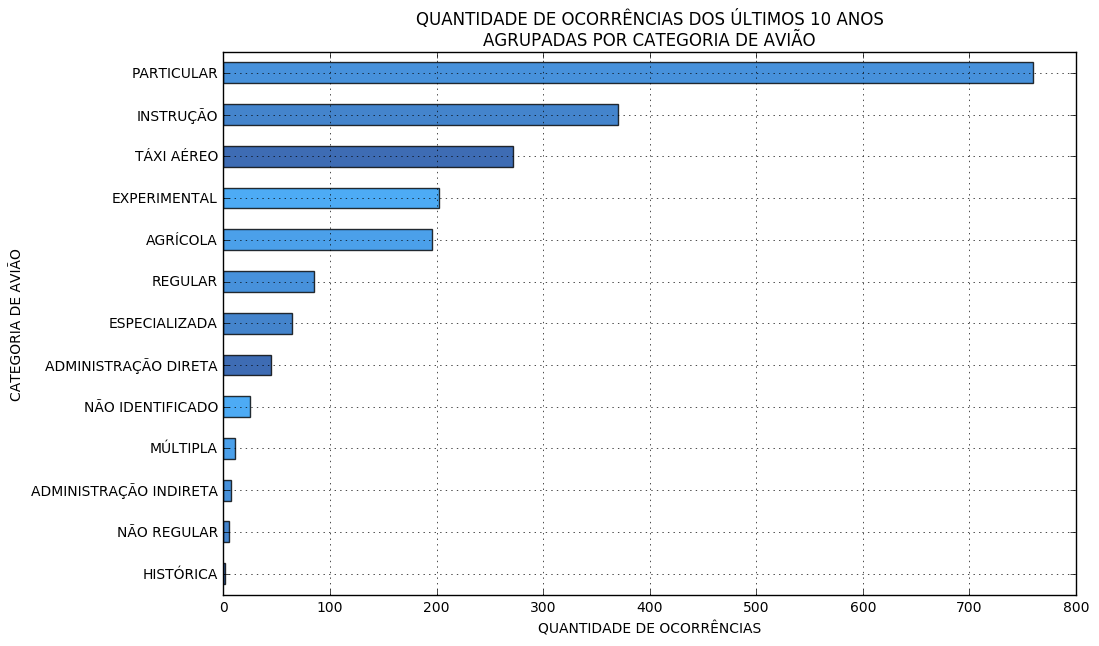

In [275]:
categoria_aviao = aeronave.groupby('CATEGORIA DE AVIÃO')['CONTAGEM'].sum().sort_values().plot(kind='barh', figsize=(11,7), color=random.choice(colors), alpha=.8, grid = True)

plt.title('QUANTIDADE DE OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS\nAGRUPADAS POR CATEGORIA DE AVIÃO')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()


Muitas pessoas tem medo de voar. Isso é fato, contudo, esses dados mostrados no gráfico acima mostram que esse medo pode ser diminuído. A esmagadora maioria de ocorrências registradas são atribuídas a aeronaves particulares, que podem ser desde monomotores e ultraleves até aviões particulares. O transporte Regular - aquele que companhias aéreas oferecem para o público em geral -, possui menos de 100 ocorrências nos últimos anos. Tais dados explicam o porquê da Neiva Industria ser uma das fabricantes que mais possuem ocorrência, já que a grande fatia desta escala é atribuida aos principais tipos de avião que ela produz.

Vamos agora olhar para o momento em que as ocorrências surgiram. Com isso, quero saber se é mais propício ocorrer um problema durante o pouso, decolagem ou outro momento da viagem.

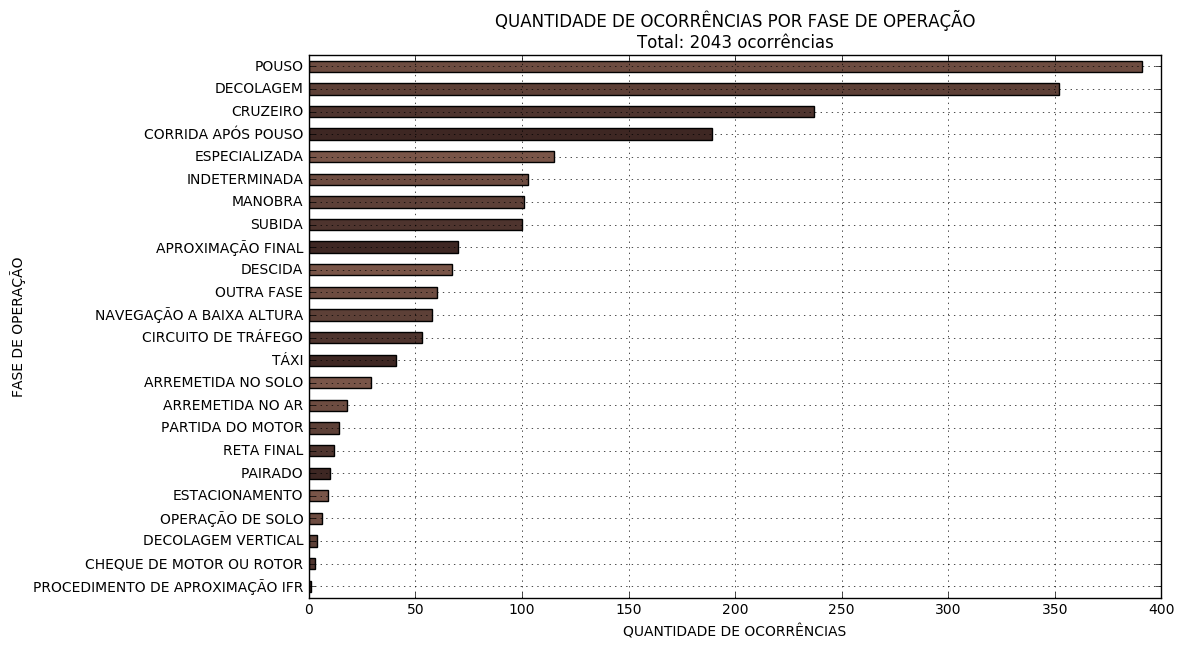

In [276]:
fase_de_operacao = aeronave.groupby('FASE DE OPERAÇÃO')['CONTAGEM'].sum().sort_values().plot(kind='barh', figsize=(11,7), color=random.choice(colors), grid = True)
plt.title('QUANTIDADE DE OCORRÊNCIAS POR FASE DE OPERAÇÃO\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

De fato, o momento do pouso é um dos mais importantes da viagem. Cerca de 400 ocorrências, das mais de 2000 registradas ocorreram nesta fase. Contudo, vale ressaltar que a decolagem está consideravelmente próxima ao pouso, fazendo dela uma operação delicada também. Já a fase de cruzeiro, que se encontra em terceira posição, é o momento da viagem em si, quando o avião está trafegando da origem ao destino.

Como já disse anteriormente, nem toda ocorrência gerada resulta em fatalidades e danos na aeronave. Uma ocorrência, como o nome já diz, se refere ao fato de que algum evento não previsto ocorreu.

Não obstante, esta é uma pergunta interessante a se responder. Afinal, <b>quais são os tipos de danos que podem ocorrer a uma aeronave? Qual a frequência?</b>

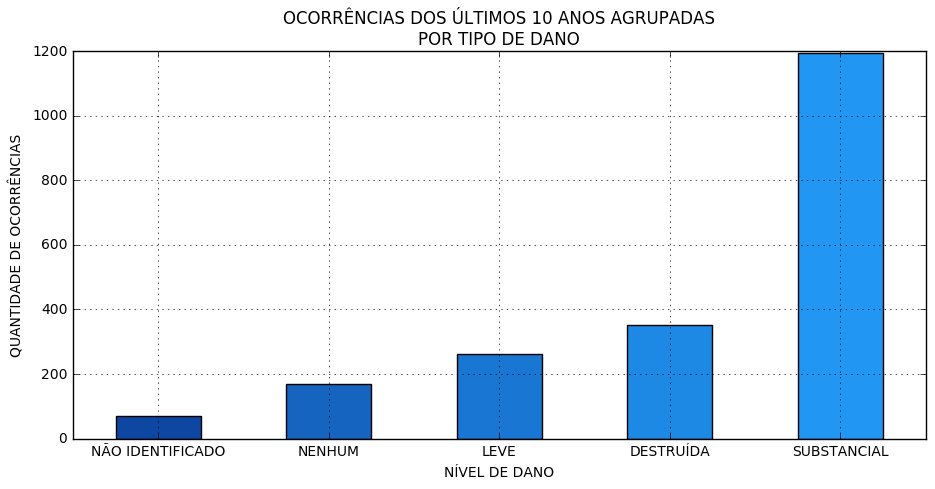

In [284]:
tipo_de_dano = aeronave.groupby('NÍVEL DE DANO')['CONTAGEM'].sum().sort_values().plot(kind='bar', figsize=(11,5), color=random.choice(colors), grid = True)

plt.title('OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS AGRUPADAS\nPOR TIPO DE DANO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

Danos substanciais são aqueles que danificaram significantemente a aeronave. Há casos em que a fuselagem foi danificada, uma asa, turbina, hélice, dentre outros. Este tipo é o que mais surgiu durante esses anos, seguido por danos em que a aeronave ficou totalmente destruída.

Por fim, quero saber em quantas ocorrências houveram fatalidades. Para ter essa informação, agruparei os casos onde pessoas morreram por quantidade, a fim de saber não só quantas fatalidades houveram nesta última década, mas também a sua frequência.

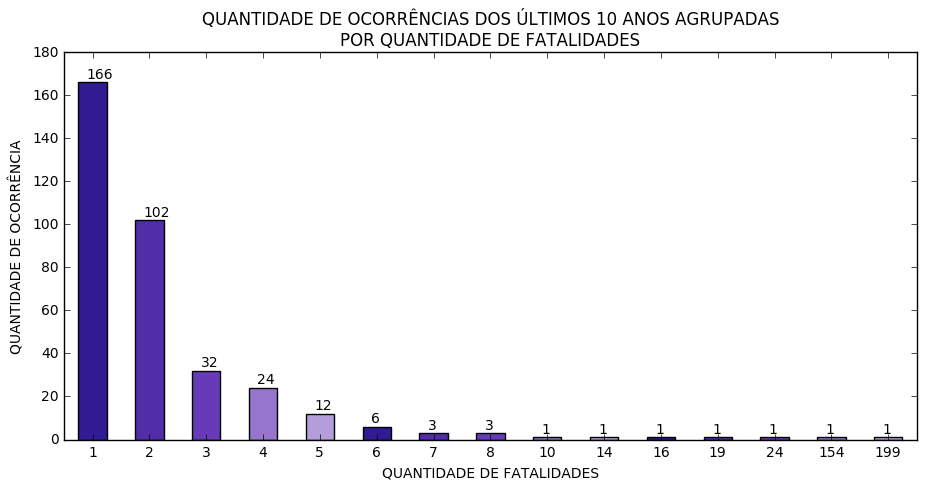

In [278]:
fatalidades_maior_que_zero = aeronave[aeronave['QUANTIDADE DE FATALIDADES'] > 0]
fatalidades = fatalidades_maior_que_zero.groupby('QUANTIDADE DE FATALIDADES')['CONTAGEM'].sum().plot(kind='bar', figsize=(11,5), color=random.choice(colors))

for p in fatalidades.patches:
    b=p.get_bbox()
    fatalidades.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 2))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS AGRUPADAS\nPOR QUANTIDADE DE FATALIDADES')
plt.ylabel('QUANTIDADE DE OCORRÊNCIA')
plt.xticks(rotation=0)
plt.show()

Para esse gráfico, ignorei casos onde não houveram fatalidades, que felizmente, é a grande maioria. Os dados restantes geraram o gráfico acima, que mostra que a maior frequência de mortes é atribuída a apenas uma pessoa. Novamente, lembre-se que a maioria das ocorrências registradas são de aviões a pistão, aeronaves estas presentes na linha de produção da fabricante com mais ocorrências: a Neiva Industria. Aeronaves monomotores e ultraleves possuem uma quantidade de assentos bem limitada - cerca de um ou dois. Tais quantidades são justamente encontradas nas duas primeiras posições do gráfico.

Mas, dois casos me chamaram a atenção. Ao final do gráfico, é possível visualizar que há um caso onde morreram 154 pessoas e outro onde 199 fatalidades ocorreram. Sinceramente, não me lembrava de nenhum caso nos últimos anos envolvendo uma quantidade tão grande de mortes, sendo assim, decidi investigar.

Abaixo, você pode conferir as duas linhas onde essas ocorrências se encontram na tabela.

In [279]:
piores_acidentes = aeronave[aeronave['QUANTIDADE DE FATALIDADES'] > 100]
piores_acidentes

,CÓDIGO DA OCORRÊNCIA,EQUIPAMENTO,FABRICANTE,MODELO,TIPO DE MOTOR,QUANTIDADE DE MOTORES,QUANTIDADE DE ASSENTOS,ANO DE FABRICAÇÃO,PAÍS DE REGISTRO,CATEGORIA DE AVIÃO,FASE DE OPERAÇÃO,TIPO DE OPERAÇÃO,NÍVEL DE DANO,QUANTIDADE DE FATALIDADES,CONTAGEM
620,29859,AVIÃO,AIRBUS INDUSTRIE,A320-233,JATO,2,185,1998,BRASIL,REGULAR,POUSO,REGULAR,DESTRUÍDA,199,1
638,30375,AVIÃO,BOEING COMPANY,737-8EH,JATO,2,188,2006,BRASIL,REGULAR,CRUZEIRO,REGULAR,DESTRUÍDA,154,1


Após uma pesquisa, lembrei-me de qual caso foi este. Trata-se do desastre envolvendo um Airbus A-320 no ano de 2007 em São Paulo, quando este tentou, sem sucesso, pousar na pista principal do aeroporto de Congonhas. Sob chuva, a aeronave ultrapassou os limites do aeroporto, atravessou a avenida Washington Luiz - chegando a tocar em um táxi durante o trajeto - e acabou se chocando contra um prédio da TAM Express. Você pode conferir maiores informações sobre esse trágico acidente que matou 199 pessoas <a href='http://noticias.uol.com.br/ultnot/especial/acidentecongonhas/ultnot/2007/07/27/ult5258u401.jhtm'>clicando aqui</a>

In [280]:
#Linha da ocorrência gerada devido ao acidente do Airbus A-320
ocorrencia[ocorrencia['CÓDIGO DA OCORRÊNCIA'] == 29859]

,CÓDIGO DA OCORRÊNCIA,CLASSIFICAÇÃO,TIPO DE OCORRÊNCIA,LOCALIDADE,UF,PAÍS,DIA DA OCORRÊNCIA,STATUS DA INVESTIGAÇÃO,CONTAGEM
1900,29859,ACIDENTE,PERDA DE CONTROLE NO SOLO,SÃO PAULO,SP,BRASIL,2007-07-17,FINALIZADA,1


O segundo pior caso completou 10 anos em 29/09/2016, quando um boeing da Gol chocou-se contra jato Legacy que se dirigia para os Estados Unidos. Com a queda, a aeronave caiu em uma mata fechada no Mato Grosso do Sul, matando 154 pessoas a bordo, incluindo passageiros e tripulação. <a href='http://g1.globo.com/mato-grosso/noticia/2016/09/acidente-com-aviao-da-gol-que-matou-154-pessoas-completa-10-anos.html'>Confira maiores detalhes clicando aqui</a>.

In [281]:
ocorrencia[ocorrencia['CÓDIGO DA OCORRÊNCIA'] == 30375]

,CÓDIGO DA OCORRÊNCIA,CLASSIFICAÇÃO,TIPO DE OCORRÊNCIA,LOCALIDADE,UF,PAÍS,DIA DA OCORRÊNCIA,STATUS DA INVESTIGAÇÃO,CONTAGEM
855,30375,ACIDENTE,COLISÃO DE AERONAVES EM VOO,PEIXOTO DE AZEVEDO,MT,BRASIL,2006-09-29,FINALIZADA,1


<h1>Conclusão</h1>

Aviões e aeronaves não estão insentas de sofrerem acidentes e problemas. A história tem registros de casos onde centenas de pessoas morreram e milhares de ocorrências foram geradas. Não obstante, vale lembrar que, embora o impacto gerado por uma queda de avião seja grande, sua probabilidade de ocorrer ainda é pequena. 

Mas, vamos levar em consideração outros meios de transporte, como o carro e moto. Apenas no Brasil em 2013, <a href='www.un.org/apps/news/story.asp?NewsID=52300#.ViZ1yNKrSM-'>41 mil pessoas morreram devido a acidentes de trânsito</a>, fazendo do Brasil o <a href='https://nacoesunidas.org/oms-brasil-e-o-pais-com-maior-numero-de-mortes-de-transito-por-habitante-da-america-do-sul/'>país com maior número de mortes no trânsito da América do Sul</a>. Já no mundo, tais acidentes são responsáveis por mais de 1,25 milhão de fatalidades, tendo uma frequência maior em países como China, EUA e Índia. 

Sim, de fato aviões não são indestrutíveis ou absolutamente seguros, mas, mesmo em meio ao cenário atual, é uma das formas mais seguras de viajar.

Curtiu esse estudo? <a href='www.paulovasconcellos.com.br'>Aproveite para passar no meu blog</a> e ver estes e outras notícias e projetos de Data Science. <a href='https://twitter.com/paulo_zip'>Aproveite e me siga no Twitter</a> para que possamos trocar idéias. Será um prazer ter você lá. Até mais!

<h2>Referências</h2>
<br>
https://nacoesunidas.org/oms-brasil-e-o-pais-com-maior-numero-de-mortes-de-transito-por-habitante-da-america-do-sul/<br>
http://www.un.org/apps/news/story.asp?NewsID=52300#.ViZ1yNKrSM-<br>
http://g1.globo.com/mato-grosso/noticia/2016/09/acidente-com-aviao-da-gol-que-matou-154-pessoas-completa-10-anos.html<br>
http://noticias.uol.com.br/ultnot/especial/acidentecongonhas/ultnot/2007/07/27/ult5258u401.jhtm<br>
http://globoesporte.globo.com/sc/futebol/times/chapecoense/acidente/